In [1]:
import os
import glob
import jiwer
from jiwer import cer, wer
import math
from statistics import mean, stdev
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, ttest_ind, ttest_rel, wilcoxon, mannwhitneyu

In [3]:
print("Current working directory:", os.getcwd())

# read ground truth files
with open("data/ground_truth_1.txt", "r", encoding="utf-8") as f:
    ground_truth_1 = f.readlines()
with open("data/ground_truth_2.txt", "r", encoding="utf-8") as f:
    ground_truth_2 = f.readlines()

# read baseline native files (they use ground truth 2)
with open("data/bl_base_n_2.txt", "r", encoding="utf-8") as f:
    bl_base_n_2 = f.readlines()
with open("data/bl_small_n_2.txt", "r", encoding="utf-8") as f:
    bl_small_n_2 = f.readlines()
with open("data/bl_medium_n_2.txt", "r", encoding="utf-8") as f:
    bl_medium_n_2 = f.readlines()
with open("data/bl_large_n_2.txt", "r", encoding="utf-8") as f:
    bl_large_n_2 = f.readlines()
    
# read baseline accented files (they use ground truth 1)
with open("data/bl_base_a_1.txt", "r", encoding="utf-8") as f:
    bl_base_a_1 = f.readlines()
with open("data/bl_small_a_1.txt", "r", encoding="utf-8") as f:
    bl_small_a_1 = f.readlines()
with open("data/bl_medium_a_1.txt", "r", encoding="utf-8") as f:
    bl_medium_a_1 = f.readlines()
with open("data/bl_large_a_1.txt", "r", encoding="utf-8") as f:
    bl_large_a_1 = f.readlines()
    
# read fine-tuned native files (they use ground truth 1)
with open("data/ft_base_n_1.txt", "r", encoding="utf-8") as f:
    ft_base_n_1 = f.readlines()
with open("data/ft_small_n_1.txt", "r", encoding="utf-8") as f:
    ft_small_n_1 = f.readlines()
with open("data/ft_medium_n_1.txt", "r", encoding="utf-8") as f:
    ft_medium_n_1 = f.readlines()
with open("data/ft_large_n_1.txt", "r", encoding="utf-8") as f:
    ft_large_n_1 = f.readlines()
    
# read fine-tuned accented files (they use ground truth 1)
with open("data/ft_base_a_1.txt", "r", encoding="utf-8") as f:
    ft_base_a_1 = f.readlines()
with open("data/ft_small_a_1.txt", "r", encoding="utf-8") as f:
    ft_small_a_1 = f.readlines()
with open("data/ft_medium_a_1.txt", "r", encoding="utf-8") as f:
    ft_medium_a_1 = f.readlines()
with open("data/ft_large_a_1.txt", "r", encoding="utf-8") as f:
    ft_large_a_1 = f.readlines()

Current working directory: C:\Users\maria\Desktop\MSc Voice Technology\Term 2B - THESIS\whisper-related scripts\fine-tuned_condition


In [16]:
# calculate WER for baseline native (wrt ground truth 2)
dataInput = [bl_base_n_2, bl_small_n_2, bl_medium_n_2, bl_large_n_2]
use_ground_truth = ground_truth_2
wer_bl_n = np.zeros((np.size(use_ground_truth),4))
iteration = 0
for m in dataInput:
    line_no = 0
    cer_scores = []
    wer_scores = []
    for line in m:
        reference = use_ground_truth[line_no]
        hypothesis = line
        char_error = cer(reference, hypothesis)
        word_error = wer(reference, hypothesis)
        cer_scores.append(char_error)
        wer_scores.append(word_error)
        line_no += 1
    wer_bl_n[:,iteration] = wer_scores
    iteration += 1

In [17]:
# calculate WER for baseline accented (wrt ground truth 1)
dataInput = [bl_base_a_1, bl_small_a_1, bl_medium_a_1, bl_large_a_1]
use_ground_truth = ground_truth_1
wer_bl_a = np.zeros((np.size(use_ground_truth),4))
iteration = 0
for m in dataInput:
    line_no = 0
    cer_scores = []
    wer_scores = []
    for line in m:
        reference = use_ground_truth[line_no]
        hypothesis = line
        char_error = cer(reference, hypothesis)
        word_error = wer(reference, hypothesis)
        cer_scores.append(char_error)
        wer_scores.append(word_error)
        line_no += 1
    wer_bl_a[:,iteration] = wer_scores
    iteration += 1

In [18]:
# calculate WER for fine-tuned native (wrt ground truth 1)
dataInput = [ft_base_n_1, ft_small_n_1, ft_medium_n_1, ft_large_n_1]
use_ground_truth = ground_truth_1
wer_ft_n = np.zeros((np.size(use_ground_truth),4))
iteration = 0
for m in dataInput:
    line_no = 0
    cer_scores = []
    wer_scores = []
    for line in m:
        reference = use_ground_truth[line_no]
        hypothesis = line
        char_error = cer(reference, hypothesis)
        word_error = wer(reference, hypothesis)
        cer_scores.append(char_error)
        wer_scores.append(word_error)
        line_no += 1
    wer_ft_n[:,iteration] = wer_scores
    iteration += 1

In [19]:
# calculate WER for fine-tuned accented (wrt ground truth 1)
dataInput = [ft_base_a_1, ft_small_a_1, ft_medium_a_1, ft_large_a_1]
use_ground_truth = ground_truth_1
wer_ft_a = np.zeros((np.size(use_ground_truth),4))
iteration = 0
for m in dataInput:
    line_no = 0
    cer_scores = []
    wer_scores = []
    for line in m:
        reference = use_ground_truth[line_no]
        hypothesis = line
        char_error = cer(reference, hypothesis)
        word_error = wer(reference, hypothesis)
        cer_scores.append(char_error)
        wer_scores.append(word_error)
        line_no += 1
    wer_ft_a[:,iteration] = wer_scores
    iteration += 1

In [20]:
wer_ft = np.zeros((125,8))
wer_ft[:,0] = wer_ft_a[:,0]
wer_ft[:,1] = wer_ft_n[:,0]
wer_ft[:,2] = wer_ft_a[:,1]
wer_ft[:,3] = wer_ft_n[:,1]
wer_ft[:,4] = wer_ft_a[:,2]
wer_ft[:,5] = wer_ft_n[:,2]
wer_ft[:,6] = wer_ft_a[:,3]
wer_ft[:,7] = wer_ft_n[:,3]

In [21]:
import pandas as pd

In [23]:
wer_ft_DF = pd.DataFrame(wer_ft)
display(wer_ft_DF)

,0,1,2,3,4,5,6,7
0,0.571429,0.857143,0.285714,0.714286,0.285714,0.571429,0.571429,0.571429
1,0.419355,0.258065,0.225806,0.354839,0.193548,0.225806,0.258065,0.225806
2,0.520000,0.200000,0.480000,0.200000,0.360000,0.160000,0.280000,0.200000
3,0.272727,0.636364,0.363636,0.272727,0.272727,0.545455,0.272727,0.454545
4,0.142857,0.285714,0.214286,0.357143,0.142857,0.214286,0.285714,0.142857
...,...,...,...,...,...,...,...,...
120,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
121,0.370370,0.296296,0.296296,0.148148,0.148148,0.111111,0.185185,0.148148
122,0.363636,0.500000,0.500000,0.409091,0.318182,0.363636,0.454545,0.454545
123,0.454545,0.363636,0.181818,0.181818,0.181818,0.227273,0.181818,0.227273


(0.0, 1.5)

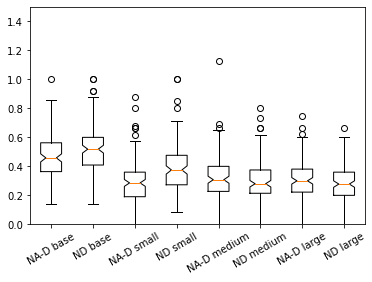

In [25]:
plt.boxplot(wer_ft, notch = True, labels = ["NA-D base", "ND base", "NA-D small", "ND small", 
                   "NA-D medium", "ND medium", "NA-D large", "ND large"])
plt.xticks(rotation=30)
plt.ylim((0,1.5))

Text(0, 0.5, 'Mean Word Error Rate')

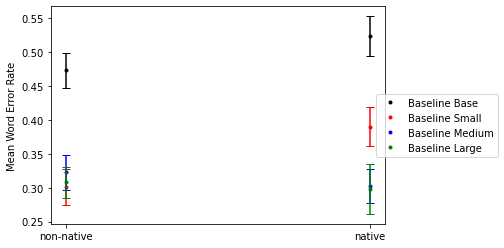

In [36]:
plt.plot(["non-native", "native"], np.mean(allOutput[:,(0,1)],axis=0), 'k.', label="Baseline Base")
plt.plot(["non-native", "native"], np.mean(allOutput[:,(2,3)],axis=0), 'r.', label="Baseline Small")
plt.plot(["non-native", "native"], np.mean(allOutput[:,(4,5)],axis=0), 'b.', label="Baseline Medium")
plt.plot(["non-native", "native"], np.mean(allOutput[:,(6,7)],axis=0), 'g.', label="Baseline Large")
plt.errorbar(["non-native", "native"], np.mean(allOutput[:,(0,1)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(0,1)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'k')
plt.errorbar(["non-native", "native"], np.mean(allOutput[:,(2,3)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(2,3)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.errorbar(["non-native", "native"], np.mean(allOutput[:,(4,5)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(4,5)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.errorbar(["non-native", "native"], np.mean(allOutput[:,(6,7)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(6,7)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'g')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.62))
plt.ylabel("Mean Word Error Rate")

Mean WER bl_n: [0.48903422 0.33067558 0.25264764 0.23014446]
std. error for mean WER bl_n: [0.0242624  0.01527122 0.01489453 0.01710034]
Mean WER bl_a: [0.5597436  0.44770102 0.36923295 0.3350199 ]
std. error for mean WER bl_a: [0.01455746 0.0152946  0.01366089 0.01262903]


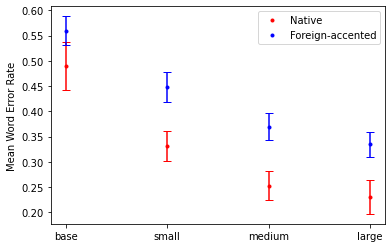

In [68]:
# Comp 1: Baseline native vs accented
plt.plot(["base", "small", "medium", "large"], np.mean(wer_bl_n,axis=0), 'r.', label="Native")
plt.plot(["base", "small", "medium", "large"], np.mean(wer_bl_a,axis=0), 'b.', label="Foreign-accented")
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_bl_n,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_bl_n, axis=0)/np.sqrt(np.shape(wer_bl_n)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_bl_a,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_bl_a, axis=0)/np.sqrt(np.shape(wer_bl_a)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.legend(loc='upper right')
plt.ylabel("Mean Word Error Rate")

se_bl_n = np.std(wer_bl_n, axis=0)/np.sqrt(np.shape(wer_bl_n)[0])
se_bl_a = np.std(wer_bl_a, axis=0)/np.sqrt(np.shape(wer_bl_a)[0])
print(f"Mean WER bl_n: {np.mean(wer_bl_n,axis=0)}")
print(f"std. error for mean WER bl_n: {se_bl_n}")
print(f"Mean WER bl_a: {np.mean(wer_bl_a,axis=0)}")
print(f"std. error for mean WER bl_a: {se_bl_a}")

Mean WER ft_n: [0.52335586 0.39014325 0.30250606 0.29831266]
std. error for mean WER ft_n: [0.01496763 0.01462143 0.01278067 0.01882918]
Mean WER ft_a: [0.47286633 0.30048934 0.3226239  0.30832389]
std. error for mean WER ft_a: [0.0131142  0.01345463 0.01326661 0.01170245]


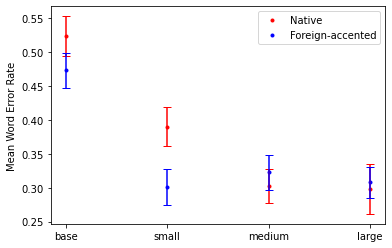

In [69]:
# Comp 2: Fine-tuned native vs accented
plt.plot(["base", "small", "medium", "large"], np.mean(wer_ft_n,axis=0), 'r.', label="Native")
plt.plot(["base", "small", "medium", "large"], np.mean(wer_ft_a,axis=0), 'b.', label="Foreign-accented")
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_ft_n,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_ft_n, axis=0)/np.sqrt(np.shape(wer_ft_n)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_ft_a,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_ft_a, axis=0)/np.sqrt(np.shape(wer_ft_a)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.legend(loc='upper right')
plt.ylabel("Mean Word Error Rate")

print(f"Mean WER ft_n: {np.mean(wer_ft_n,axis=0)}")
print(f"std. error for mean WER ft_n: {np.std(wer_ft_n, axis=0)/np.sqrt(np.shape(wer_ft_n)[0])}")
print(f"Mean WER ft_a: {np.mean(wer_ft_a,axis=0)}")
print(f"std. error for mean WER ft_a: {np.std(wer_ft_a, axis=0)/np.sqrt(np.shape(wer_ft_a)[0])}")

Mean WER bl_a: [0.5597436  0.44770102 0.36923295 0.3350199 ]
std. error for mean WER bl_a: [0.01455746 0.0152946  0.01366089 0.01262903]
Mean WER ft_a: [0.47286633 0.30048934 0.3226239  0.30832389]
std. error for mean WER ft_a: [0.0131142  0.01345463 0.01326661 0.01170245]


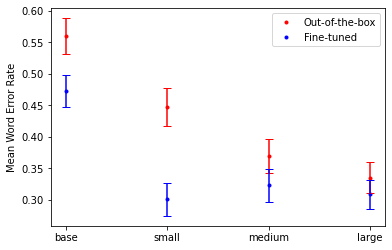

In [72]:
# Comp 3: Baseline accented vs fine-tuned accented
plt.plot(["base", "small", "medium", "large"], np.mean(wer_bl_a,axis=0), 'r.', label="Out-of-the-box")
plt.plot(["base", "small", "medium", "large"], np.mean(wer_ft_a,axis=0), 'b.', label="Fine-tuned")
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_bl_a,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_bl_a, axis=0)/np.sqrt(np.shape(wer_bl_a)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_ft_a,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_ft_a, axis=0)/np.sqrt(np.shape(wer_ft_a)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.legend(loc='upper right')
plt.ylabel("Mean Word Error Rate")

print(f"Mean WER bl_a: {np.mean(wer_bl_a,axis=0)}")
print(f"std. error for mean WER bl_a: {np.std(wer_bl_a, axis=0)/np.sqrt(np.shape(wer_bl_a)[0])}")
print(f"Mean WER ft_a: {np.mean(wer_ft_a,axis=0)}")
print(f"std. error for mean WER ft_a: {np.std(wer_ft_a, axis=0)/np.sqrt(np.shape(wer_ft_a)[0])}")

mean WER of bl_n: [0.48903422 0.33067558 0.25264764 0.23014446]
Standar error of mean WER of bl_n: [0.0242624  0.01527122 0.01489453 0.01710034]
mean WER of ft_n: [0.52335586 0.39014325 0.30250606 0.29831266]
Standar error of mean WER of ft_n: [0.01496763 0.01462143 0.01278067 0.01882918]


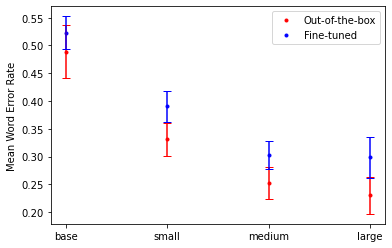

In [73]:
# Comp 3: Baseline native vs fine-tuned native
plt.plot(["base", "small", "medium", "large"], np.mean(wer_bl_n,axis=0), 'r.', label="Out-of-the-box")
plt.plot(["base", "small", "medium", "large"], np.mean(wer_ft_n,axis=0), 'b.', label="Fine-tuned")
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_bl_n,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_bl_n, axis=0)/np.sqrt(np.shape(wer_bl_n)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.errorbar(["base", "small", "medium", "large"], np.mean(wer_ft_n,axis=0), 
             yerr = norm.ppf(0.975)*np.std(wer_ft_n, axis=0)/np.sqrt(np.shape(wer_ft_n)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.legend(loc='upper right')
plt.ylabel("Mean Word Error Rate")

print(f"mean WER of bl_n: {np.mean(wer_bl_n,axis=0)}")
print(f"Standar error of mean WER of bl_n: {np.std(wer_bl_n, axis=0)/np.sqrt(np.shape(wer_bl_n)[0])}")
print(f"mean WER of ft_n: {np.mean(wer_ft_n,axis=0)}")
print(f"Standar error of mean WER of ft_n: {np.std(wer_ft_n, axis=0)/np.sqrt(np.shape(wer_ft_n)[0])}")

In [38]:
model_names = ["Baseline Base", "Baseline Small", "Baseline Medium", "Baseline Large"]

for i in range(4):
    print("Testing model: " + model_names[i])
    x = output[:,i]
    y = output_n[:,i]
    # variation 1: use t-test (valid for unpaired, independent samples) 
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-tests
    # note: in our samples, this assumption is broken since the WERs are calculated on the same underlying text, so these samples are not independent
    print("1a (t-test, same var):       pvalue = " + np.array2string(ttest_ind(x, y, equal_var=True, alternative="greater").pvalue))
    # variation 1b: do not assume same variance (Welch's t-test, unpaired, independent sample)
    print("1b (t-test, different var):  pvalue = " + np.array2string(ttest_ind(x, y, equal_var=False, alternative="greater").pvalue))
    # variation 2: use paired t-test
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
    print("2 (paired t-test):           pvalue = " + np.array2string(ttest_rel(x, y, alternative="greater").pvalue))
    # variation 3: use Wilcoxon signed-rank test (non-parametric, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
    d = np.around(x - y, decimals=3)
    print("3 (Wilcoxon SR test):        pvalue = " + np.array2string(wilcoxon(d, alternative="greater").pvalue))
    # variation 4: use Mann-Whitney U-test (non-parametric, indep samples, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    print("4 (MW U-test):               pvalue = " + np.array2string(mannwhitneyu(x, y, alternative="greater").pvalue))
    print("-------------------------------------------------")

Testing model: Baseline Base
1a (t-test, same var):       pvalue = 0.99393634
1b (t-test, different var):  pvalue = 0.99393091
2 (paired t-test):           pvalue = 0.99957612
3 (Wilcoxon SR test):        pvalue = 0.99961204
4 (MW U-test):               pvalue = 0.99545258
-------------------------------------------------
Testing model: Baseline Small
1a (t-test, same var):       pvalue = 0.99999463
1b (t-test, different var):  pvalue = 0.99999462
2 (paired t-test):           pvalue = 0.99999999
3 (Wilcoxon SR test):        pvalue = 0.99999997
4 (MW U-test):               pvalue = 0.99999877
-------------------------------------------------
Testing model: Baseline Medium
1a (t-test, same var):       pvalue = 0.13888893
1b (t-test, different var):  pvalue = 0.13888967
2 (paired t-test):           pvalue = 0.05208048
3 (Wilcoxon SR test):        pvalue = 0.01376637
4 (MW U-test):               pvalue = 0.09124355
-------------------------------------------------
Testing model: Baseline L

In [ ]:
plt.plot(["base", "small", "medium", "large"], np.mean(allOutput[:,(0,2,4,6)],axis=0), 'b.', label="Foreign-accented")
plt.plot(["base", "small", "medium", "large"], np.mean(allOutput[:,(1,3,5,7)],axis=0), 'r.', label="Native")
plt.errorbar(["base", "small", "medium", "large"], np.mean(allOutput[:,(0,2,4,6)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(0,2,4,6)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'b')
plt.errorbar(["base", "small", "medium", "large"], np.mean(allOutput[:,(1,3,5,7)],axis=0), 
             yerr = norm.ppf(0.975)*np.std(allOutput[:,(1,3,5,7)], axis=0)/np.sqrt(np.shape(allOutput)[0]),
            fmt='none', capsize=4, ecolor = 'r')
plt.legend(loc='upper right')
plt.ylabel("Mean Word Error Rate")

In [54]:
# Comp 1: bl_n vs bl_a 
# Is the WER significantly different between native and accented speech in the baseline models?
# NOTE: paired test not possible here
model_names = ["Baseline Base", "Baseline Small", "Baseline Medium", "Baseline Large"]

for i in range(4):
    print("Testing model: " + model_names[i])
    x = wer_bl_n[:,i]
    y = wer_bl_a[:,i]
    # variation 1: use t-test (valid for unpaired, independent samples) 
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-tests
    # note: in our samples, this assumption is broken since the WERs are calculated on the same underlying text, so these samples are not independent
    print("1a (t-test, same var):       pvalue = " + np.array2string(ttest_ind(x, y, equal_var=True, alternative="two-sided").pvalue))
    # variation 1b: do not assume same variance (Welch's t-test, unpaired, independent sample)
    print("1b (t-test, different var):  pvalue = " + np.array2string(ttest_ind(x, y, equal_var=False, alternative="two-sided").pvalue))
    # variation 2: use paired t-test
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
    print("2 (paired t-test):           pvalue = " + np.array2string(ttest_rel(x, y, alternative="two-sided").pvalue))
    # variation 3: use Wilcoxon signed-rank test (non-parametric, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
    d = np.around(x - y, decimals=3)
    print("3 (Wilcoxon SR test):        pvalue = " + np.array2string(wilcoxon(d, alternative="two-sided").pvalue))
    # variation 4: use Mann-Whitney U-test (non-parametric, indep samples, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    print("4 (MW U-test):               pvalue = " + np.array2string(mannwhitneyu(x, y, alternative="two-sided").pvalue))
    print("-------------------------------------------------")

Testing model: Baseline Base
1a (t-test, same var):       pvalue = 0.01346601
1b (t-test, different var):  pvalue = 0.01361308
2 (paired t-test):           pvalue = 0.01429146
3 (Wilcoxon SR test):        pvalue = 0.00015539
4 (MW U-test):               pvalue = 0.00013032
-------------------------------------------------
Testing model: Baseline Small
1a (t-test, same var):       pvalue = 1.61636011e-07
1b (t-test, different var):  pvalue = 1.61636309e-07
2 (paired t-test):           pvalue = 1.59161894e-06
3 (Wilcoxon SR test):        pvalue = 5.65670122e-08
4 (MW U-test):               pvalue = 1.41631309e-09
-------------------------------------------------
Testing model: Baseline Medium
1a (t-test, same var):       pvalue = 2.67714752e-08
1b (t-test, different var):  pvalue = 2.69686065e-08
2 (paired t-test):           pvalue = 7.29989317e-07
3 (Wilcoxon SR test):        pvalue = 3.57259113e-10
4 (MW U-test):               pvalue = 6.33238639e-12
-----------------------------------

In [53]:
# Comp 2: ft_n vs ft_a 
# Is the WER significantly different between native and accented speech in the fine-tuned models?
# NOTE: paired test possible here
model_names = ["Fine-Tuned Base", "Fine-Tuned Small", "Fine-Tuned Medium", "Fine-Tuned Large"]

for i in range(4):
    print("Testing model: " + model_names[i])
    x = wer_ft_n[:,i]
    y = wer_ft_a[:,i]
    # variation 1: use t-test (valid for unpaired, independent samples) 
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-tests
    # note: in our samples, this assumption is broken since the WERs are calculated on the same underlying text, so these samples are not independent
    print("1a (t-test, same var):       pvalue = " + np.array2string(ttest_ind(x, y, equal_var=True, alternative="two-sided").pvalue))
    # variation 1b: do not assume same variance (Welch's t-test, unpaired, independent sample)
    print("1b (t-test, different var):  pvalue = " + np.array2string(ttest_ind(x, y, equal_var=False, alternative="two-sided").pvalue))
    # variation 2: use paired t-test
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
    print("2 (paired t-test):           pvalue = " + np.array2string(ttest_rel(x, y, alternative="two-sided").pvalue))
    # variation 3: use Wilcoxon signed-rank test (non-parametric, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
    d = np.around(x - y, decimals=3)
    print("3 (Wilcoxon SR test):        pvalue = " + np.array2string(wilcoxon(d, alternative="two-sided").pvalue))
    # variation 4: use Mann-Whitney U-test (non-parametric, indep samples, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    print("4 (MW U-test):               pvalue = " + np.array2string(mannwhitneyu(x, y, alternative="two-sided").pvalue))
    print("-------------------------------------------------")

Testing model: Fine-Tuned Base
1a (t-test, same var):       pvalue = 0.01212731
1b (t-test, different var):  pvalue = 0.01213818
2 (paired t-test):           pvalue = 0.00084776
3 (Wilcoxon SR test):        pvalue = 0.00077592
4 (MW U-test):               pvalue = 0.00914144
-------------------------------------------------
Testing model: Fine-Tuned Small
1a (t-test, same var):       pvalue = 1.07314008e-05
1b (t-test, different var):  pvalue = 1.07615182e-05
2 (paired t-test):           pvalue = 1.10141247e-08
3 (Wilcoxon SR test):        pvalue = 5.07964595e-08
4 (MW U-test):               pvalue = 2.49017674e-06
-------------------------------------------------
Testing model: Fine-Tuned Medium
1a (t-test, same var):       pvalue = 0.27777787
1b (t-test, different var):  pvalue = 0.27777934
2 (paired t-test):           pvalue = 0.10416095
3 (Wilcoxon SR test):        pvalue = 0.02753274
4 (MW U-test):               pvalue = 0.1824871
-------------------------------------------------


In [55]:
# Comp 3: bl_a vs ft_a 
# Is the WER significantly different between the baseline and the fine-tuned models for accented speech?
# NOTE: paired test possible here
model_names = ["Fine-Tuned Base", "Fine-Tuned Small", "Fine-Tuned Medium", "Fine-Tuned Large"]

for i in range(4):
    print("Testing model: " + model_names[i])
    x = wer_bl_a[:,i]
    y = wer_ft_a[:,i]
    # variation 1: use t-test (valid for unpaired, independent samples) 
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-tests
    # note: in our samples, this assumption is broken since the WERs are calculated on the same underlying text, so these samples are not independent
    print("1a (t-test, same var):       pvalue = " + np.array2string(ttest_ind(x, y, equal_var=True, alternative="two-sided").pvalue))
    # variation 1b: do not assume same variance (Welch's t-test, unpaired, independent sample)
    print("1b (t-test, different var):  pvalue = " + np.array2string(ttest_ind(x, y, equal_var=False, alternative="two-sided").pvalue))
    # variation 2: use paired t-test
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
    print("2 (paired t-test):           pvalue = " + np.array2string(ttest_rel(x, y, alternative="two-sided").pvalue))
    # variation 3: use Wilcoxon signed-rank test (non-parametric, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
    d = np.around(x - y, decimals=3)
    print("3 (Wilcoxon SR test):        pvalue = " + np.array2string(wilcoxon(d, alternative="two-sided").pvalue))
    # variation 4: use Mann-Whitney U-test (non-parametric, indep samples, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    print("4 (MW U-test):               pvalue = " + np.array2string(mannwhitneyu(x, y, alternative="two-sided").pvalue))
    print("-------------------------------------------------")

Testing model: Fine-Tuned Base
1a (t-test, same var):       pvalue = 1.50072075e-05
1b (t-test, different var):  pvalue = 1.50693871e-05
2 (paired t-test):           pvalue = 3.44149008e-11
3 (Wilcoxon SR test):        pvalue = 7.09654048e-11
4 (MW U-test):               pvalue = 2.08611621e-05
-------------------------------------------------
Testing model: Fine-Tuned Small
1a (t-test, same var):       pvalue = 7.26034864e-12
1b (t-test, different var):  pvalue = 7.52195708e-12
2 (paired t-test):           pvalue = 2.40665952e-22
3 (Wilcoxon SR test):        pvalue = 6.4232771e-18
4 (MW U-test):               pvalue = 7.23337535e-13
-------------------------------------------------
Testing model: Fine-Tuned Medium
1a (t-test, same var):       pvalue = 0.01548008
1b (t-test, different var):  pvalue = 0.01548069
2 (paired t-test):           pvalue = 5.43080789e-09
3 (Wilcoxon SR test):        pvalue = 6.52994423e-08
4 (MW U-test):               pvalue = 0.00699775
----------------------

In [57]:
# Comp 4: bl_n vs ft_n
# Is the WER significantly different between the baseline and the fine-tuned models for native speech?
# NOTE: paired test possible here
model_names = ["Fine-Tuned Base", "Fine-Tuned Small", "Fine-Tuned Medium", "Fine-Tuned Large"]

for i in range(4):
    print("Testing model: " + model_names[i])
    x = wer_bl_n[:,i]
    y = wer_ft_n[:,i]
    # variation 1: use t-test (valid for unpaired, independent samples) 
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-tests
    # note: in our samples, this assumption is broken since the WERs are calculated on the same underlying text, so these samples are not independent
    print("1a (t-test, same var):       pvalue = " + np.array2string(ttest_ind(x, y, equal_var=True, alternative="two-sided").pvalue))
    # variation 1b: do not assume same variance (Welch's t-test, unpaired, independent sample)
    print("1b (t-test, different var):  pvalue = " + np.array2string(ttest_ind(x, y, equal_var=False, alternative="two-sided").pvalue))
    # variation 2: use paired t-test
    # see https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
    print("2 (paired t-test):           pvalue = " + np.array2string(ttest_rel(x, y, alternative="two-sided").pvalue))
    # variation 3: use Wilcoxon signed-rank test (non-parametric, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
    d = np.around(x - y, decimals=3)
    print("3 (Wilcoxon SR test):        pvalue = " + np.array2string(wilcoxon(d, alternative="two-sided").pvalue))
    # variation 4: use Mann-Whitney U-test (non-parametric, indep samples, so more robust -> fewer assumptions needed)
    # see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    print("4 (MW U-test):               pvalue = " + np.array2string(mannwhitneyu(x, y, alternative="two-sided").pvalue))
    print("-------------------------------------------------")

Testing model: Fine-Tuned Base
1a (t-test, same var):       pvalue = 0.23162829
1b (t-test, different var):  pvalue = 0.23185838
2 (paired t-test):           pvalue = 0.22869827
3 (Wilcoxon SR test):        pvalue = 0.03121891
4 (MW U-test):               pvalue = 0.02471052
-------------------------------------------------
Testing model: Fine-Tuned Small
1a (t-test, same var):       pvalue = 0.00548839
1b (t-test, different var):  pvalue = 0.00548916
2 (paired t-test):           pvalue = 0.00832591
3 (Wilcoxon SR test):        pvalue = 0.00279547
4 (MW U-test):               pvalue = 0.00177015
-------------------------------------------------
Testing model: Fine-Tuned Medium
1a (t-test, same var):       pvalue = 0.01201951
1b (t-test, different var):  pvalue = 0.01203396
2 (paired t-test):           pvalue = 0.01458988
3 (Wilcoxon SR test):        pvalue = 0.00123524
4 (MW U-test):               pvalue = 0.00135283
-------------------------------------------------
Testing model: Fine